In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



2024-10-17 13:21:10.268929: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 13:21:10.590816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 13:21:11.427825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 17946 images belonging to 7 classes.
Found 17941 images belonging to 7 classes.
Train and Validation sets have been created.


2024-10-17 13:21:13.232481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-17 13:21:13.412837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-17 13:21:13.412984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.


In [2]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)



Epoch 1/500


2024-10-17 13:21:16.689306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-17 13:21:17.697654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-17 13:21:17.713631: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x74fdcacfc1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-17 13:21:17.713648: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-17 13:21:17.728715: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-17 13:21:17.868403: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

141/141 [==============================] - 125s 869ms/step - loss: 2.4845 - accuracy: 0.1923 - val_loss: 1.8514 - val_accuracy: 0.2503
Epoch 2/500
141/141 [==============================] - 133s 941ms/step - loss: 2.2722 - accuracy: 0.2253 - val_loss: 1.7721 - val_accuracy: 0.3188
Epoch 3/500
141/141 [==============================] - 133s 942ms/step - loss: 2.1510 - accuracy: 0.2434 - val_loss: 1.7405 - val_accuracy: 0.3324
Epoch 4/500
141/141 [==============================] - 137s 971ms/step - loss: 2.0923 - accuracy: 0.2531 - val_loss: 1.7297 - val_accuracy: 0.3359
Epoch 5/500
141/141 [==============================] - 143s 1s/step - loss: 2.0345 - accuracy: 0.2695 - val_loss: 1.7237 - val_accuracy: 0.3416
Epoch 6/500
141/141 [==============================] - 133s 946ms/step - loss: 1.9964 - accuracy: 0.2707 - val_loss: 1.7063 - val_accuracy: 0.3455
Epoch 7/500
141/141 [==============================] - 134s 949ms/step - loss: 1.9658 - accuracy: 0.2737 - val_loss: 1.7000 - val_acc

141/141 [==============================] - 12s 88ms/step - loss: 1.5990 - accuracy: 0.3698 - val_loss: 1.5574 - val_accuracy: 0.3884
Epoch 58/500
141/141 [==============================] - 12s 88ms/step - loss: 1.6051 - accuracy: 0.3678 - val_loss: 1.5472 - val_accuracy: 0.3943
Epoch 59/500
141/141 [==============================] - 12s 87ms/step - loss: 1.5940 - accuracy: 0.3723 - val_loss: 1.5565 - val_accuracy: 0.3894
Epoch 60/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5955 - accuracy: 0.3737 - val_loss: 1.5547 - val_accuracy: 0.3894
Epoch 61/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5983 - accuracy: 0.3702 - val_loss: 1.5487 - val_accuracy: 0.3945
Epoch 62/500
141/141 [==============================] - 12s 87ms/step - loss: 1.5894 - accuracy: 0.3752 - val_loss: 1.5511 - val_accuracy: 0.3917
Epoch 63/500
141/141 [==============================] - 12s 87ms/step - loss: 1.5906 - accuracy: 0.3747 - val_loss: 1.5561 - val_accuracy

141/141 [==============================] - 12s 88ms/step - loss: 1.5296 - accuracy: 0.4033 - val_loss: 1.5401 - val_accuracy: 0.4007
Epoch 114/500
141/141 [==============================] - 12s 87ms/step - loss: 1.5405 - accuracy: 0.3956 - val_loss: 1.5338 - val_accuracy: 0.4035
Epoch 115/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5313 - accuracy: 0.4011 - val_loss: 1.5304 - val_accuracy: 0.4069
Epoch 116/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5338 - accuracy: 0.4022 - val_loss: 1.5312 - val_accuracy: 0.4087
Epoch 117/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5281 - accuracy: 0.4061 - val_loss: 1.5305 - val_accuracy: 0.4072
Epoch 118/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5314 - accuracy: 0.4011 - val_loss: 1.5338 - val_accuracy: 0.4064
Epoch 119/500
141/141 [==============================] - 12s 88ms/step - loss: 1.5338 - accuracy: 0.3995 - val_loss: 1.5316 - val_ac

Epoch 169/500
141/141 [==============================] - 12s 87ms/step - loss: 1.5009 - accuracy: 0.4140 - val_loss: 1.5358 - val_accuracy: 0.4056
Epoch 170/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4936 - accuracy: 0.4162 - val_loss: 1.5316 - val_accuracy: 0.4097
Epoch 171/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4994 - accuracy: 0.4168 - val_loss: 1.5300 - val_accuracy: 0.4109
Epoch 172/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4982 - accuracy: 0.4164 - val_loss: 1.5260 - val_accuracy: 0.4117
Epoch 173/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4942 - accuracy: 0.4175 - val_loss: 1.5298 - val_accuracy: 0.4104
Epoch 174/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4942 - accuracy: 0.4182 - val_loss: 1.5304 - val_accuracy: 0.4105
Epoch 175/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4980 - accuracy: 0.4183 - val_loss: 1

Epoch 225/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4738 - accuracy: 0.4274 - val_loss: 1.5282 - val_accuracy: 0.4129
Epoch 226/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4766 - accuracy: 0.4224 - val_loss: 1.5313 - val_accuracy: 0.4133
Epoch 227/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4684 - accuracy: 0.4260 - val_loss: 1.5375 - val_accuracy: 0.4107
Epoch 228/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4691 - accuracy: 0.4238 - val_loss: 1.5296 - val_accuracy: 0.4141
Epoch 229/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4614 - accuracy: 0.4340 - val_loss: 1.5296 - val_accuracy: 0.4142
Epoch 230/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4651 - accuracy: 0.4297 - val_loss: 1.5299 - val_accuracy: 0.4140
Epoch 231/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4653 - accuracy: 0.4268 - val_loss: 1

Epoch 281/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4505 - accuracy: 0.4379 - val_loss: 1.5293 - val_accuracy: 0.4144
Epoch 282/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4468 - accuracy: 0.4371 - val_loss: 1.5393 - val_accuracy: 0.4138
Epoch 283/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4420 - accuracy: 0.4409 - val_loss: 1.5310 - val_accuracy: 0.4178
Epoch 284/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4540 - accuracy: 0.4369 - val_loss: 1.5301 - val_accuracy: 0.4160
Epoch 285/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4450 - accuracy: 0.4409 - val_loss: 1.5309 - val_accuracy: 0.4160
Epoch 286/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4450 - accuracy: 0.4395 - val_loss: 1.5300 - val_accuracy: 0.4170
Epoch 287/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4484 - accuracy: 0.4400 - val_loss: 1

Epoch 337/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4287 - accuracy: 0.4477 - val_loss: 1.5411 - val_accuracy: 0.4180
Epoch 338/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4304 - accuracy: 0.4456 - val_loss: 1.5399 - val_accuracy: 0.4132
Epoch 339/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4375 - accuracy: 0.4463 - val_loss: 1.5350 - val_accuracy: 0.4198
Epoch 340/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4204 - accuracy: 0.4475 - val_loss: 1.5350 - val_accuracy: 0.4167
Epoch 341/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4301 - accuracy: 0.4451 - val_loss: 1.5328 - val_accuracy: 0.4198
Epoch 342/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4309 - accuracy: 0.4425 - val_loss: 1.5358 - val_accuracy: 0.4149
Epoch 343/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4250 - accuracy: 0.4434 - val_loss: 1

Epoch 393/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4032 - accuracy: 0.4554 - val_loss: 1.5406 - val_accuracy: 0.4149
Epoch 394/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4079 - accuracy: 0.4573 - val_loss: 1.5424 - val_accuracy: 0.4166
Epoch 395/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4159 - accuracy: 0.4500 - val_loss: 1.5400 - val_accuracy: 0.4150
Epoch 396/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4061 - accuracy: 0.4541 - val_loss: 1.5434 - val_accuracy: 0.4171
Epoch 397/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4080 - accuracy: 0.4601 - val_loss: 1.5385 - val_accuracy: 0.4198
Epoch 398/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4090 - accuracy: 0.4585 - val_loss: 1.5336 - val_accuracy: 0.4198
Epoch 399/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4082 - accuracy: 0.4524 - val_loss: 1

Epoch 449/500
141/141 [==============================] - 12s 88ms/step - loss: 1.3930 - accuracy: 0.4632 - val_loss: 1.5529 - val_accuracy: 0.4154
Epoch 450/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4048 - accuracy: 0.4555 - val_loss: 1.5418 - val_accuracy: 0.4190
Epoch 451/500
141/141 [==============================] - 12s 88ms/step - loss: 1.3953 - accuracy: 0.4616 - val_loss: 1.5466 - val_accuracy: 0.4184
Epoch 452/500
141/141 [==============================] - 12s 87ms/step - loss: 1.4044 - accuracy: 0.4551 - val_loss: 1.5438 - val_accuracy: 0.4204
Epoch 453/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4063 - accuracy: 0.4537 - val_loss: 1.5398 - val_accuracy: 0.4209
Epoch 454/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4014 - accuracy: 0.4580 - val_loss: 1.5472 - val_accuracy: 0.4201
Epoch 455/500
141/141 [==============================] - 12s 88ms/step - loss: 1.4067 - accuracy: 0.4586 - val_loss: 1

{'loss': [2.4845352172851562, 2.272164821624756, 2.150993585586548, 2.092331886291504, 2.034536361694336, 1.9964213371276855, 1.965773582458496, 1.9398207664489746, 1.9251216650009155, 1.8890244960784912, 1.8795835971832275, 1.8550902605056763, 1.8439041376113892, 1.8338170051574707, 1.8133015632629395, 1.8028564453125, 1.7846812009811401, 1.7910542488098145, 1.7764415740966797, 1.764497995376587, 1.752148151397705, 1.7422958612442017, 1.7295843362808228, 1.719635248184204, 1.7288378477096558, 1.7123078107833862, 1.7058963775634766, 1.699568748474121, 1.7044405937194824, 1.6913914680480957, 1.686544418334961, 1.675946593284607, 1.6731265783309937, 1.6746389865875244, 1.6653748750686646, 1.663135290145874, 1.6576154232025146, 1.650895118713379, 1.6437329053878784, 1.6490826606750488, 1.6449435949325562, 1.6449767351150513, 1.6387864351272583, 1.6350345611572266, 1.6304329633712769, 1.6281358003616333, 1.6275097131729126, 1.621444821357727, 1.6166867017745972, 1.6170393228530884, 1.61509

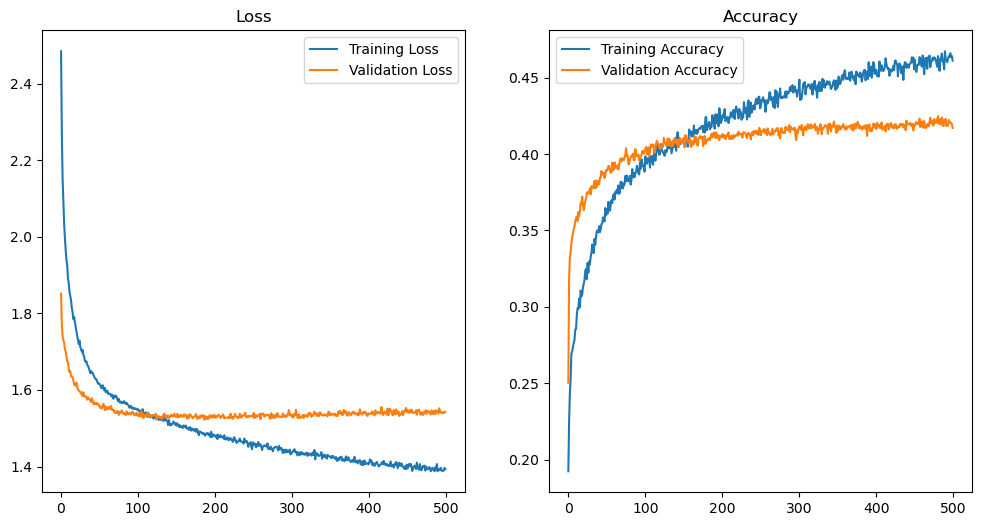

In [3]:
# Print training history
print(history.history)

# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [4]:
#FERRESNET5050 RATION

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 17946 images belonging to 7 classes.
Found 17941 images belonging to 7 classes.
Train and Validation sets have been created.
Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           

 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
          

 conv3_block2_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    
          

                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_blo

 D)                                                                                               
                                                                                                  
 conv3_block8_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block8_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block8_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block8_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block8_1_relu[0][0]'] 
 D)                                                                                               
          

 conv4_block2_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block2_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_add (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_out[0][0]',    
                                                                     'conv4_block2_3_bn[0][0]']   
                                                                                                  
 conv4_block2_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block2_add[0][0]']    
 on)      

                                                                                                  
 conv4_block5_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_blo

 rmalization)                                                                                     
                                                                                                  
 conv4_block8_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block8_2_conv (Conv2  (None, 3, 3, 256)            590080    ['conv4_block8_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block8_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block8_2_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv4_block10_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block10_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block11_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block10_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block11_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block11_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block11_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block11_1_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block13_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block13_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block12_out[0][0]',   
                                                                     'conv4_block13_3_bn[0][0]']  
                                                                                                  
 conv4_block13_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block13_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block16_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block16_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block16_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block16_3_conv[0][0]']
 ormalization)                                                                                    
          

 conv4_block19_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block19_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block19_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block19_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block19_2_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block22_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block21_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block22_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block22_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block22_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block22_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block24_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block23_out[0][0]',   
                                                                     'conv4_block24_3_bn[0][0]']  
                                                                                                  
 conv4_block24_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block24_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block25_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block24_out[0][0]']   
 2D)                                                                                              
          

 conv4_block27_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block27_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block27_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block27_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block27_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block27_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block27_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block26_out[0][0]',   
          

                                                                                                  
 conv4_block30_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block30_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block30_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block30_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block30_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block30_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block33_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block33_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block33_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block33_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block33_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block33_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block35_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block34_out[0][0]',   
                                                                     'conv4_block35_3_bn[0][0]']  
                                                                                                  
 conv4_block35_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block35_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block36_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block35_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block36_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block36_1_conv[0][0]']
 ormalizat

                                                                                                  
 conv5_block2_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block2_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_blo

In [6]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)



Epoch 1/500
141/141 [==============================] - 21s 108ms/step - loss: 2.4723 - accuracy: 0.1735 - val_loss: 1.9170 - val_accuracy: 0.2494
Epoch 2/500
141/141 [==============================] - 13s 94ms/step - loss: 2.2979 - accuracy: 0.1976 - val_loss: 1.9194 - val_accuracy: 0.2561
Epoch 3/500
141/141 [==============================] - 13s 95ms/step - loss: 2.1906 - accuracy: 0.2104 - val_loss: 1.9458 - val_accuracy: 0.2164
Epoch 4/500
141/141 [==============================] - 13s 95ms/step - loss: 2.1584 - accuracy: 0.2152 - val_loss: 1.8267 - val_accuracy: 0.2861
Epoch 5/500
141/141 [==============================] - 13s 95ms/step - loss: 2.1177 - accuracy: 0.2234 - val_loss: 1.9735 - val_accuracy: 0.2660
Epoch 6/500
141/141 [==============================] - 14s 99ms/step - loss: 2.0735 - accuracy: 0.2293 - val_loss: 2.0084 - val_accuracy: 0.2596
Epoch 7/500
141/141 [==============================] - 14s 102ms/step - loss: 2.0552 - accuracy: 0.2378 - val_loss: 1.7924 - val_

Epoch 57/500
141/141 [==============================] - 22s 156ms/step - loss: 1.7210 - accuracy: 0.3176 - val_loss: 1.7162 - val_accuracy: 0.3310
Epoch 58/500
141/141 [==============================] - 22s 157ms/step - loss: 1.7137 - accuracy: 0.3186 - val_loss: 1.6638 - val_accuracy: 0.3564
Epoch 59/500
141/141 [==============================] - 25s 181ms/step - loss: 1.7104 - accuracy: 0.3232 - val_loss: 1.6653 - val_accuracy: 0.3384
Epoch 60/500
141/141 [==============================] - 25s 180ms/step - loss: 1.7143 - accuracy: 0.3177 - val_loss: 1.6711 - val_accuracy: 0.3394
Epoch 61/500
141/141 [==============================] - 26s 185ms/step - loss: 1.7057 - accuracy: 0.3209 - val_loss: 1.7583 - val_accuracy: 0.2864
Epoch 62/500
141/141 [==============================] - 23s 165ms/step - loss: 1.7113 - accuracy: 0.3183 - val_loss: 1.8172 - val_accuracy: 0.2659
Epoch 63/500
141/141 [==============================] - 28s 199ms/step - loss: 1.7045 - accuracy: 0.3216 - val_loss: 1

Epoch 113/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6628 - accuracy: 0.3413 - val_loss: 1.6972 - val_accuracy: 0.3360
Epoch 114/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6669 - accuracy: 0.3332 - val_loss: 1.7761 - val_accuracy: 0.3137
Epoch 115/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6604 - accuracy: 0.3434 - val_loss: 1.6887 - val_accuracy: 0.3179
Epoch 116/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6675 - accuracy: 0.3391 - val_loss: 1.7316 - val_accuracy: 0.3093
Epoch 117/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6677 - accuracy: 0.3399 - val_loss: 1.6631 - val_accuracy: 0.3431
Epoch 118/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6623 - accuracy: 0.3437 - val_loss: 1.6769 - val_accuracy: 0.3416
Epoch 119/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6622 - accuracy: 0.3440 - val_loss: 1

Epoch 169/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6452 - accuracy: 0.3518 - val_loss: 1.6167 - val_accuracy: 0.3646
Epoch 170/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6459 - accuracy: 0.3514 - val_loss: 1.6243 - val_accuracy: 0.3630
Epoch 171/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6487 - accuracy: 0.3473 - val_loss: 1.7909 - val_accuracy: 0.3370
Epoch 172/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6465 - accuracy: 0.3479 - val_loss: 1.6519 - val_accuracy: 0.3452
Epoch 173/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6466 - accuracy: 0.3501 - val_loss: 1.6689 - val_accuracy: 0.3387
Epoch 174/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6421 - accuracy: 0.3499 - val_loss: 1.8768 - val_accuracy: 0.2894
Epoch 175/500
141/141 [==============================] - 13s 95ms/step - loss: 1.6408 - accuracy: 0.3513 - val_loss: 1

141/141 [==============================] - 14s 98ms/step - loss: 1.6384 - accuracy: 0.3529 - val_loss: 1.5887 - val_accuracy: 0.3831
Epoch 225/500
141/141 [==============================] - 14s 99ms/step - loss: 1.6330 - accuracy: 0.3562 - val_loss: 1.8663 - val_accuracy: 0.2903
Epoch 226/500
141/141 [==============================] - 14s 99ms/step - loss: 1.6303 - accuracy: 0.3534 - val_loss: 1.6012 - val_accuracy: 0.3701
Epoch 227/500
141/141 [==============================] - 14s 101ms/step - loss: 1.6307 - accuracy: 0.3545 - val_loss: 1.9545 - val_accuracy: 0.2655
Epoch 228/500
141/141 [==============================] - 15s 106ms/step - loss: 1.6313 - accuracy: 0.3542 - val_loss: 1.6724 - val_accuracy: 0.3576
Epoch 229/500
141/141 [==============================] - 14s 102ms/step - loss: 1.6309 - accuracy: 0.3570 - val_loss: 1.6508 - val_accuracy: 0.3479
Epoch 230/500
141/141 [==============================] - 14s 101ms/step - loss: 1.6335 - accuracy: 0.3556 - val_loss: 1.7450 - va

Epoch 280/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6217 - accuracy: 0.3640 - val_loss: 1.6597 - val_accuracy: 0.3481
Epoch 281/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6244 - accuracy: 0.3585 - val_loss: 1.7693 - val_accuracy: 0.3100
Epoch 282/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6209 - accuracy: 0.3659 - val_loss: 1.6185 - val_accuracy: 0.3700
Epoch 283/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6200 - accuracy: 0.3633 - val_loss: 1.8612 - val_accuracy: 0.2714
Epoch 284/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6321 - accuracy: 0.3585 - val_loss: 1.6644 - val_accuracy: 0.3373
Epoch 285/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6237 - accuracy: 0.3568 - val_loss: 1.6847 - val_accuracy: 0.3131
Epoch 286/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6275 - accuracy: 0.3596 - val_loss: 1

Epoch 336/500
141/141 [==============================] - 13s 96ms/step - loss: 1.6229 - accuracy: 0.3599 - val_loss: 1.7070 - val_accuracy: 0.3654
Epoch 337/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6152 - accuracy: 0.3669 - val_loss: 1.5747 - val_accuracy: 0.3830
Epoch 338/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6143 - accuracy: 0.3634 - val_loss: 1.6959 - val_accuracy: 0.3310
Epoch 339/500
141/141 [==============================] - 13s 96ms/step - loss: 1.6178 - accuracy: 0.3607 - val_loss: 1.6785 - val_accuracy: 0.3435
Epoch 340/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6077 - accuracy: 0.3675 - val_loss: 1.8225 - val_accuracy: 0.2913
Epoch 341/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6173 - accuracy: 0.3665 - val_loss: 1.6142 - val_accuracy: 0.3765
Epoch 342/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6133 - accuracy: 0.3648 - val_loss: 1

Epoch 392/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6091 - accuracy: 0.3642 - val_loss: 1.6158 - val_accuracy: 0.3643
Epoch 393/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6082 - accuracy: 0.3672 - val_loss: 1.6342 - val_accuracy: 0.3480
Epoch 394/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6080 - accuracy: 0.3641 - val_loss: 1.5892 - val_accuracy: 0.3809
Epoch 395/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6049 - accuracy: 0.3666 - val_loss: 1.5690 - val_accuracy: 0.3863
Epoch 396/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6079 - accuracy: 0.3628 - val_loss: 2.1427 - val_accuracy: 0.2243
Epoch 397/500
141/141 [==============================] - 14s 97ms/step - loss: 1.6039 - accuracy: 0.3673 - val_loss: 1.5958 - val_accuracy: 0.3928
Epoch 398/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6151 - accuracy: 0.3650 - val_loss: 1

Epoch 448/500
141/141 [==============================] - 14s 100ms/step - loss: 1.6040 - accuracy: 0.3686 - val_loss: 1.6296 - val_accuracy: 0.3498
Epoch 449/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6059 - accuracy: 0.3654 - val_loss: 1.5778 - val_accuracy: 0.3865
Epoch 450/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6045 - accuracy: 0.3740 - val_loss: 1.5958 - val_accuracy: 0.3695
Epoch 451/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6061 - accuracy: 0.3698 - val_loss: 1.6887 - val_accuracy: 0.3320
Epoch 452/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6028 - accuracy: 0.3741 - val_loss: 1.5806 - val_accuracy: 0.3839
Epoch 453/500
141/141 [==============================] - 14s 96ms/step - loss: 1.5994 - accuracy: 0.3706 - val_loss: 1.5744 - val_accuracy: 0.3915
Epoch 454/500
141/141 [==============================] - 14s 96ms/step - loss: 1.6016 - accuracy: 0.3732 - val_loss: 

{'loss': [2.4723336696624756, 2.2978508472442627, 2.1906497478485107, 2.1583645343780518, 2.1177256107330322, 2.073517322540283, 2.0552024841308594, 2.02850079536438, 2.005873680114746, 1.9760699272155762, 1.9699043035507202, 1.9578595161437988, 1.9399741888046265, 1.926850438117981, 1.920406460762024, 1.9077147245407104, 1.8954099416732788, 1.8868911266326904, 1.8840322494506836, 1.8648161888122559, 1.8539526462554932, 1.8464068174362183, 1.844403862953186, 1.8393930196762085, 1.8327654600143433, 1.8227877616882324, 1.8141218423843384, 1.8173872232437134, 1.8071670532226562, 1.8014788627624512, 1.7985928058624268, 1.7861682176589966, 1.7821990251541138, 1.7797564268112183, 1.7780611515045166, 1.7775434255599976, 1.7721837759017944, 1.7601369619369507, 1.7613604068756104, 1.7519042491912842, 1.7584686279296875, 1.7478138208389282, 1.7482976913452148, 1.7463032007217407, 1.7434883117675781, 1.7382701635360718, 1.7376223802566528, 1.7328691482543945, 1.7371959686279297, 1.732936263084411

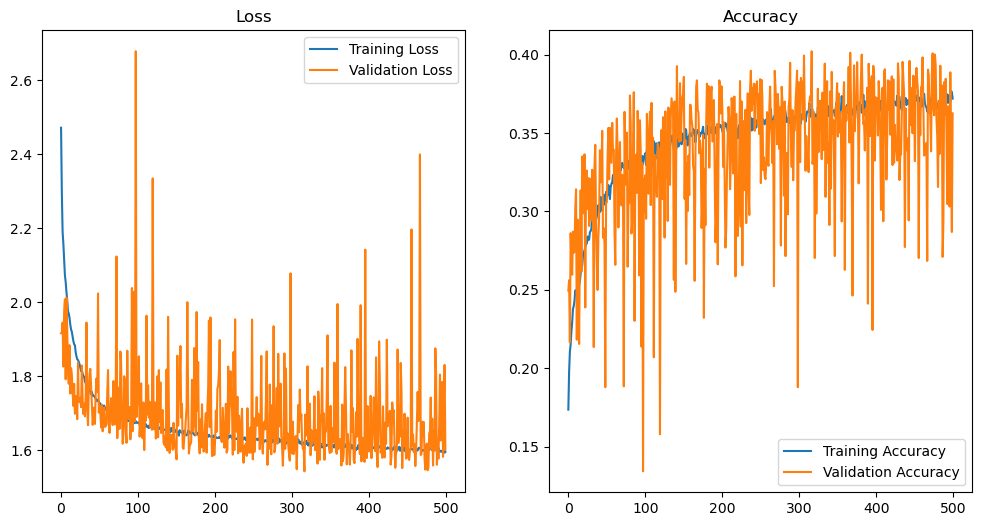

In [7]:
# Print training history
print(history.history)

# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()